In [7]:
import MDAnalysis as mda
import warnings
# suppress some MDAnalysis warnings about PSF files
warnings.filterwarnings('ignore')
from MDAnalysis.analysis import align
import nglview as nv
from MDAnalysis.analysis import rms
from MDAnalysis.analysis import dihedrals
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Initialize Universe with Gromacs files
u = mda.Universe('npt_modified.gro', 'centered_nojump_md.xtc')

# Align and average structure
average = align.AverageStructure(u, u, select='protein and name CA', ref_frame=0).run()
ref = average.results.universe
aligner = align.AlignTraj(u, ref, select='protein and name CA', in_memory=True).run()

# Select a specific segment
system = u.select_atoms ('all')
alpha = u.select_atoms('bynum 1:4368')
ct_alpha = u.select_atoms('bynum 4368:4505')
beta = u.select_atoms('bynum 4506:8802')
ct_beta = u.select_atoms('bynum 8802:9035')
stalk = u.select_atoms('bynum 9036:9808', 'bynum 10732 :11596')
mtbd = u.select_atoms('bynum 9809:10726')
tublin = alpha + beta
ctails = ct_alpha + ct_beta
sys_wo_ct_stalk = system - ctails - stalk
mtbd_stalk = stalk+mtbd
# Select residues for MTBD
mtbd_H1 = u.select_atoms('resid 3302:3309')
mtbd_H2 = u.select_atoms('resid 3315:3328')
mtbd_H3 = u.select_atoms('resid 3335:3342')
mtbd_H4 = u.select_atoms('resid 3349:3353')
mtbd_H5 = u.select_atoms('resid 3356:3358')
mtbd_H6 = u.select_atoms('resid 3361:3373')
mtbd_H7 = u.select_atoms('resid 3379:3385')

In [8]:
def calculate_average_rmsf(selection):
    rmsf_per_residue = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_per_residue.append(np.mean(rmsf.rmsf))
    return np.mean(rmsf_per_residue)

# Define your selections
selections = {
    'MTBD-H1': mtbd_H1,
    'MTBD-H2': mtbd_H2,
    'MTBD-H3': mtbd_H3,
    'MTBD-H4': mtbd_H4,
    'MTBD-H5': mtbd_H5,
    'MTBD-H6': mtbd_H6,
    'MTBD-H7': mtbd_H7,
}

# Calculate average RMSF for each selection
for name, selection in selections.items():
    average_rmsf = calculate_average_rmsf(selection)
    print(f"Average RMSF for {name}: {average_rmsf}")


Average RMSF for MTBD-H1: 4.926034050849462
Average RMSF for MTBD-H2: 5.681544559956826
Average RMSF for MTBD-H3: 6.1780048642878445
Average RMSF for MTBD-H4: 4.934903247186552
Average RMSF for MTBD-H5: 5.752886515456474
Average RMSF for MTBD-H6: 6.314326589438978
Average RMSF for MTBD-H7: 5.541776672334369


In [9]:
def calculate_rmsf_and_range(selection):
    rmsf_per_residue = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_per_residue.append(np.mean(rmsf.rmsf))
    rmsf_range = np.max(rmsf_per_residue) - np.min(rmsf_per_residue)
    first_residue = selection.residues.resids[0]
    last_residue = selection.residues.resids[-1]
    return np.mean(rmsf_per_residue), rmsf_range, first_residue, last_residue

# Define your selections
selections = {
    'MTBD-H1': mtbd_H1,
    'MTBD-H2': mtbd_H2,
    'MTBD-H3': mtbd_H3,
    'MTBD-H4': mtbd_H4,
    'MTBD-H5': mtbd_H5,
    'MTBD-H6': mtbd_H6,
    'MTBD-H7': mtbd_H7,
}

# Calculate average RMSF, RMSF range, first and last residue for each selection
for name, selection in selections.items():
    average_rmsf, rmsf_range, first_residue, last_residue = calculate_rmsf_and_range(selection)
    print(f"For {name}:")
    print(f"Average RMSF: {average_rmsf}")
    print(f"RMSF Range: {rmsf_range}")
    print(f"First Residue: {first_residue}")
    print(f"Last Residue: {last_residue}")
    print("\n")


For MTBD-H1:
Average RMSF: 4.926034050849462
RMSF Range: 0.5069232355531303
First Residue: 3302
Last Residue: 3309


For MTBD-H2:
Average RMSF: 5.681544559956826
RMSF Range: 0.9093119473832258
First Residue: 3315
Last Residue: 3328


For MTBD-H3:
Average RMSF: 6.1780048642878445
RMSF Range: 1.5711898875597852
First Residue: 3335
Last Residue: 3342


For MTBD-H4:
Average RMSF: 4.934903247186552
RMSF Range: 0.45151515699937583
First Residue: 3349
Last Residue: 3353


For MTBD-H5:
Average RMSF: 5.752886515456474
RMSF Range: 0.9196005084035868
First Residue: 3356
Last Residue: 3358


For MTBD-H6:
Average RMSF: 6.314326589438978
RMSF Range: 0.977362603531307
First Residue: 3361
Last Residue: 3373


For MTBD-H7:
Average RMSF: 5.541776672334369
RMSF Range: 0.9565484825487349
First Residue: 3379
Last Residue: 3385




In [10]:
def calculate_rmsf_and_range(selection):
    rmsf_per_residue = []
    residue_names = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_per_residue.append(np.mean(rmsf.rmsf))
        residue_names.append(residue.resname)
    first_residue_rmsf = rmsf_per_residue[0]
    last_residue_rmsf = rmsf_per_residue[-1]
    return np.mean(rmsf_per_residue), (first_residue_rmsf, residue_names[0]), (last_residue_rmsf, residue_names[-1])

# Calculate average RMSF, RMSF for first and last residue for each selection
for name, selection in selections.items():
    average_rmsf, (first_residue_rmsf, first_residue_name), (last_residue_rmsf, last_residue_name) = calculate_rmsf_and_range(selection)
    print(f"For {name}:")
    print(f"Average RMSF: {average_rmsf}")
    print(f"First Residue RMSF: {first_residue_rmsf} for residue {first_residue_name}")
    print(f"Last Residue RMSF: {last_residue_rmsf} for residue {last_residue_name}")
    print("\n")


For MTBD-H1:
Average RMSF: 4.926034050849462
First Residue RMSF: 4.859552071101394 for residue GLN
Last Residue RMSF: 4.9430773690741034 for residue SER


For MTBD-H2:
Average RMSF: 5.681544559956826
First Residue RMSF: 6.11047737590323 for residue ALA
Last Residue RMSF: 5.285931705221052 for residue LEU


For MTBD-H3:
Average RMSF: 6.1780048642878445
First Residue RMSF: 6.503132624015259 for residue TRP
Last Residue RMSF: 5.5682648221523365 for residue ILE


For MTBD-H4:
Average RMSF: 4.934903247186552
First Residue RMSF: 4.761683558048793 for residue PRO
Last Residue RMSF: 5.2131987150481685 for residue ASN


For MTBD-H5:
Average RMSF: 5.752886515456474
First Residue RMSF: 5.314729026605999 for residue ALA
Last Residue RMSF: 6.234329535009586 for residue GLU


For MTBD-H6:
Average RMSF: 6.314326589438978
First Residue RMSF: 6.3479770398430055 for residue ASP
Last Residue RMSF: 6.762212709361308 for residue SER


For MTBD-H7:
Average RMSF: 5.541776672334369
First Residue RMSF: 5.89668

In [11]:
def calculate_rmsf(selection):
    rmsf_per_residue = []
    residue_numbers = []
    residue_names = []
    for residue in selection.residues:
        rmsf = rms.RMSF(residue.atoms).run()
        rmsf_per_residue.append(np.mean(rmsf.rmsf))
        residue_numbers.append(residue.resid)
        residue_names.append(residue.resname)
    return rmsf_per_residue, residue_numbers, residue_names


# Calculate RMSF for each selection
for name, selection in selections.items():
    rmsf, residue_numbers, residue_names = calculate_rmsf(selection)
    max_rmsf_index = np.argmax(rmsf)
    min_rmsf_index = np.argmin(rmsf)
    print(f"For {name}:")
    print(f"Highest RMSF: {rmsf[max_rmsf_index]} for residue {residue_names[max_rmsf_index]} {residue_numbers[max_rmsf_index]}")
    print(f"Lowest RMSF: {rmsf[min_rmsf_index]} for residue {residue_names[min_rmsf_index]} {residue_numbers[min_rmsf_index]}")



For MTBD-H1:
Highest RMSF: 5.100504580485754 for residue VAL 3307
Lowest RMSF: 4.593581344932623 for residue VAL 3305
For MTBD-H2:
Highest RMSF: 6.11047737590323 for residue ALA 3315
Lowest RMSF: 5.201165428520004 for residue ILE 3324
For MTBD-H3:
Highest RMSF: 7.139454709712122 for residue LYS 3336
Lowest RMSF: 5.5682648221523365 for residue ILE 3342
For MTBD-H4:
Highest RMSF: 5.2131987150481685 for residue ASN 3353
Lowest RMSF: 4.761683558048793 for residue PRO 3349
For MTBD-H5:
Highest RMSF: 6.234329535009586 for residue GLU 3358
Lowest RMSF: 5.314729026605999 for residue ALA 3356
For MTBD-H6:
Highest RMSF: 6.762212709361308 for residue SER 3373
Lowest RMSF: 5.784850105830001 for residue ILE 3363
For MTBD-H7:
Highest RMSF: 5.966116829588591 for residue GLU 3380
Lowest RMSF: 5.009568347039856 for residue ALA 3385


Average contacts between MTBD and alpha = 0.06631644819181873
Average contacts between MTBD and beta = 0.12034737956207316


C:\Users\nisar\AppData\Local\Temp\ipykernel_42816\874713091.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


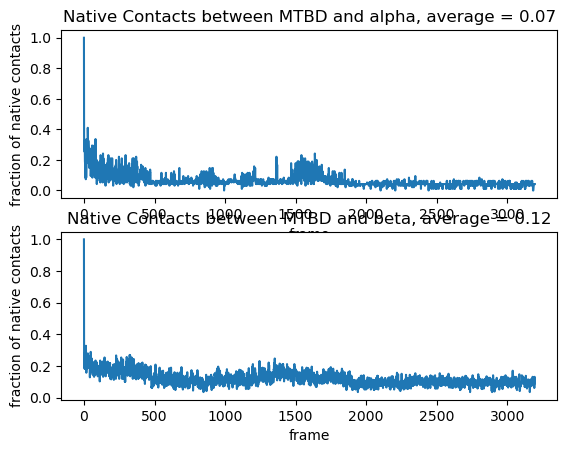

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis as mda
from MDAnalysis.analysis import contacts

# Initialize Universe with Gromacs files
u = mda.Universe('npt_modified.gro', 'centered_nojump_md.xtc')

# Define selections
alpha = u.select_atoms('bynum 1:4368')
beta = u.select_atoms('bynum 4506:8802')
mtbd = u.select_atoms('bynum 9809:10726')

# Set up analysis of native contacts ("salt bridges"); salt bridges have a distance <6 A
ca1 = contacts.Contacts(u, select=("bynum 9809:10726", "bynum 1:4368"),
                        refgroup=(mtbd, alpha), radius=4.5)
ca2 = contacts.Contacts(u, select=("bynum 9809:10726", "bynum 4506:8802"),
                        refgroup=(mtbd, beta), radius=4.5)

# Iterate through trajectory and perform analysis of "native contacts" Q
ca1.run()
ca2.run()

# Print number of average contacts
average_contacts_ca1 = np.mean(ca1.results.timeseries[:, 1])
average_contacts_ca2 = np.mean(ca2.results.timeseries[:, 1])
print('Average contacts between MTBD and alpha = {}'.format(average_contacts_ca1))
print('Average contacts between MTBD and beta = {}'.format(average_contacts_ca2))

# Plot time series q(t)
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(ca1.results.timeseries[:, 0], ca1.results.timeseries[:, 1])
ax1.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts between MTBD and alpha, average = {:.2f}'.format(average_contacts_ca1))
ax2.plot(ca2.results.timeseries[:, 0], ca2.results.timeseries[:, 1])
ax2.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts between MTBD and beta, average = {:.2f}'.format(average_contacts_ca2))
fig.show()

